## TAREA_Clase 5°_Final

In [1]:
import pandas as pd
import os
import csv
import numpy as np
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r"C:\Users\Diego\Desktop\Topicos de Eco Mate\Primera Parte del Curso\Clases Parte 1°\CLASE 07")

In [2]:
MESAS=pd.read_csv('INFOPRESIDENCIALItem.tsv',encoding ='latin1',delimiter='	', converters={'MESA': lambda x: str(x),'CCODI_UBIGEO':lambda y:str(y)})

In [3]:
PRESIDENCIAL=pd.read_csv('PRESIDENCIALsam.csv',encoding ='latin1',delimiter=',', converters={'MESA': lambda x: str(x)})

In [4]:
pd.to_numeric(PRESIDENCIAL['congresal'],errors='coerce')

0           30.0
1            1.0
2            9.0
3           14.0
4           24.0
           ...  
1009199    236.0
1009200      0.0
1009201    103.0
1009202     18.0
1009203      3.0
Name: congresal, Length: 1009204, dtype: float64

In [5]:
pd.to_numeric(PRESIDENCIAL['congresal'],errors='coerce').sum()

24722491.0

In [6]:
PRESIDENCIAL_CLEAN=PRESIDENCIAL[PRESIDENCIAL['AUTORIDAD'].isin(['TOTAL VOTOS VALIDOS','VOTOS EN BLANCO','VOTOS NULOS','VOTOS IMPUGNADO','VOTOS IMPUGNADOS','TOTAL VOTOS EMITIDOS',np.nan]).values==False]
PRESIDENCIAL_CLEAN

,Unnamed: 0,CCODI_AUTO,AUTORIDAD,NLISTA,congresal,CON_VALIDOS,CON_EMITIDOS,MESA
0,128037,7.0,FUERZA POPULAR,12.0,30,20.000,14.493,067896
1,491755,17.0,PERU PATRIA SEGURA,5.0,1,1.053,0.581,001952
2,470924,15.0,PARTIDO POPULAR CRISTIANO - PPC,11.0,9,4.545,3.782,045858
5,836489,8.0,JUNTOS POR EL PERU,10.0,12,6.780,4.839,020519
6,371403,21.0,UNION POR EL PERU,14.0,2,1.802,1.370,010138
...,...,...,...,...,...,...,...,...
1009198,322380,12.0,PARTIDO NACIONALISTA PERUANO,2.0,6,5.085,4.762,066830
1009200,637935,21.0,UNION POR EL PERU,14.0,0,0.000,0.000,055328
1009201,1436296,14.0,PARTIDO POLITICO NACIONAL PERU LIBRE,18.0,103,58.523,43.460,015911
1009202,573229,8.0,JUNTOS POR EL PERU,10.0,18,8.531,7.627,054835


In [7]:
PRESIDENCIAL_CLEAN['congresal'] = PRESIDENCIAL_CLEAN['congresal'].str.replace('#','0')

<ipython-input-7-df245aa3c1b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PRESIDENCIAL_CLEAN['congresal'] = PRESIDENCIAL_CLEAN['congresal'].str.replace('#','0')


In [8]:
pd.to_numeric(PRESIDENCIAL_CLEAN['congresal']).sum() 

7154567

In [9]:
PRESIDENCIAL2=PRESIDENCIAL_CLEAN
PRESIDENCIAL2['congresal']=pd.to_numeric(PRESIDENCIAL_CLEAN['congresal'])

<ipython-input-9-bf21f92029da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PRESIDENCIAL2['congresal']=pd.to_numeric(PRESIDENCIAL_CLEAN['congresal'])


In [10]:
MESAS_SUB=MESAS[['CCODI_UBIGEO','DEPARTAMENTO','PROVINCIA','DISTRITO','MESA']]

In [11]:
PRESIDENCIAL3 = pd.merge(PRESIDENCIAL2, MESAS_SUB,  how='left', left_on=['MESA'], right_on = ['MESA'])

In [12]:
PRESIDENCIAL3=PRESIDENCIAL3.rename(columns={"congresal": "VOTOS"})

In [13]:
PRESIDENCIAL4=PRESIDENCIAL3.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO","AUTORIDAD"],as_index=False)["VOTOS"].sum()

In [14]:
PRESIDENCIAL4.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,AUTORIDAD,VOTOS
0,AMAZONAS,BAGUA,ARAMANGO,010202,ACCION POPULAR,102
1,AMAZONAS,BAGUA,ARAMANGO,010202,ALIANZA PARA EL PROGRESO,147
2,AMAZONAS,BAGUA,ARAMANGO,010202,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,43
3,AMAZONAS,BAGUA,ARAMANGO,010202,DEMOCRACIA DIRECTA,3
4,AMAZONAS,BAGUA,ARAMANGO,010202,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",10


In [15]:
from dbfread import DBF
DATAMAP = DBF('LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.dbf', load=True,encoding='latin1')

In [16]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(5,20))

In [17]:
%matplotlib inline

In [18]:
shp_path ="LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.shp"
sf = shp.Reader(shp_path)

In [19]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (15,20)):
    '''
    Graficar el mapa con las coordenadas
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [20]:
def read_shapefile(sf):
    """
    Esta función nos permite leer un archivo Shape en un DataFrame de Pandas con 
    una columna de  "coordenadas"  manteniendo la geometría de la información. 
    Aquí se usa el paquete pyshp comentado al principio del código.  
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [21]:
DATASHAPE = read_shapefile(sf)
DATASHAPE.shape

(1874, 16)

In [22]:
DATASHAPE.sample(5)

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,coords
126,20,PIURA,01,PIURA,04,CASTILLA,CASTILLA,200104,2001,200104,16,CASTILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-80.58267130233867, -4.965569188167478), (-8..."
908,11,ICA,03,NASCA,05,VISTA ALEGRE,VISTA ALEGRE,110305,1103,110305,30,VISTA ALEGRE,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-74.71006848397332, -14.836738356889612), (-..."
1423,22,SAN MARTIN,08,RIOJA,06,POSIC,POSIC,220806,2208,220806,7,POSIC,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-77.14221536085017, -5.936870724304413), (-7..."
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-78.91577661290034, -7.320853224796451), (-7..."
1753,13,LA LIBERTAD,04,CHEPEN,02,PACANGA,PACANGA,130402,1304,130402,44,PACANGA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-79.45238961408938, -6.946295975278986), (-7..."


In [23]:
DATASHAPE = DATASHAPE.rename(columns= {'NOMBDEP':'DEPARTAMENTO','NOMBPROV':'PROVINCIA','NOMBDIST':'DISTRITO'})

In [24]:
sf.shape(851)

In [25]:
RESULTADOS_PARTIDO_DIST=PRESIDENCIAL3.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO","AUTORIDAD"],as_index=False)["VOTOS"].sum()

In [26]:
RESULTADOS_DIST=PRESIDENCIAL3.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO"],as_index=False)["VOTOS"].sum()

In [27]:
RESULTADOS_DIST_LIMA=RESULTADOS_DIST.loc[RESULTADOS_DIST.PROVINCIA=='LIMA',]

## En la siguiente línea de codigo, hemos empezado con los colores mas suaves al inicio, y al final se pusieron los mas fuertes. Eso esta bien, aqui el mapa esta coloreado al reves puesto que no aplicaron el merge entre DATASHAPE y la data, cosa que si hicimos en el examen Parcial.

## Es por ello que en realidad siempre la paleta de colores debe de empezar con los colores claros e ir hasta los oscuros.

In [28]:
def calc_color(data, color=None):
    # 1°: Se crea una paleta de colores
        if color==1: color_sq=['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq=['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors='YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors ='YlOrBr';
            
    #2° Parte: Divide la columna "VOTOS" en 6 grupos y le asigna un entero [0,5] a cada observacion dependiendo del grupo al que pertenezca.        
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))

    #3° Parte: A partir del entero de la parte anterior, agrega un color a la lista vacia color_ton    
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
    #4° Parte: Crea una leyenda de colores   (OPCIONAL)
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [29]:
def plot_map_fill_multiples_ids_tone(sf, title, ciudad,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    La función se redefine para poder tener un Heatmap o mapa de calor
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=25)
    ax.grid(True)   # Este comando sirve para agregar las lineas detras de los graficos por default    
    for id in ciudad:                            
        #print(id)
        shape_ex = sf.shape(id)
        x = [i[0] for i in shape_ex.points[:]]
        y = [i[1] for i in shape_ex.points[:]]
        plt.plot(x, y, "#000000",zorder=3)      # aqui se puede modificar el color de las lineas del grafico
        
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[ciudad.index(id)],zorder=2)
        
        if print_id == True:
            DIST=sf.record(id)['NOMBDIST']
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, DIST, fontsize=10)
            
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

In [30]:
def plot_ciudades_data(sf, title, ciudades, data=None, 
                      color=None, print_id=True,figsize=(11,20)):
    '''
    Se dibuja el mapa con los distritos indicados
    '''
    
    color_ton, bins = calc_color(data, color)
    plot_map_fill_multiples_ids_tone(sf, title, ciudades, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = figsize);

In [31]:
DISTLIMAidx=list(DATASHAPE[DATASHAPE.PROVINCIA=='LIMA'].index)

In [32]:
RESULTADOS_DIST_LIMA=RESULTADOS_DIST.loc[RESULTADOS_DIST.PROVINCIA=='LIMA',]
data1=RESULTADOS_DIST_LIMA.VOTOS


1: 625 => 12409 
2: 12410 => 23253 
3: 23254 => 39588 
4: 39589 => 59178 
5: 59179 => 103722 
6: 103723 => 266784 

   1   2   3   4   5   6


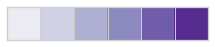

<Figure size 792x1440 with 0 Axes>

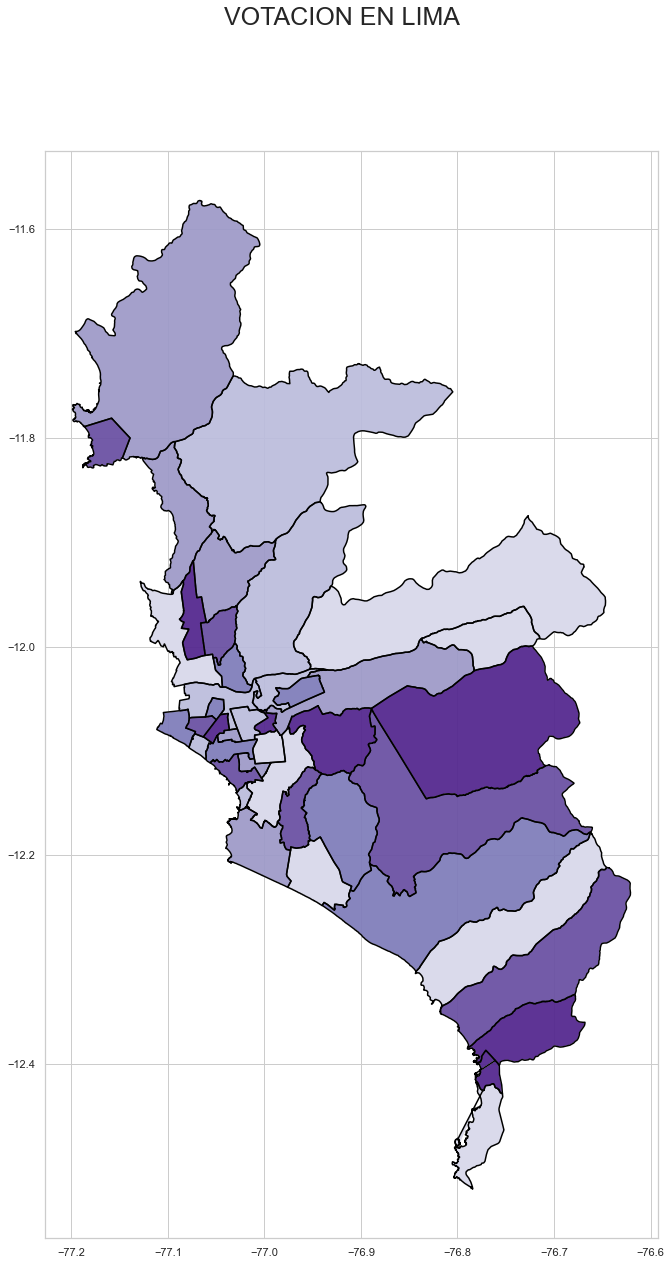

In [33]:
color_pallete = 1 # 'Púrpuras'
plot_ciudades_data(sf,'VOTACION EN LIMA', DISTLIMAidx, data=data1,color=color_pallete,print_id=False)

## Ahora veremos que no hya necesidad de cambiar el orden de verdad ( de menor a mayor) de los colores si es que aplicamos los siguientes cambios a las bases de datos.

In [ ]:
DISTLIMAidx=list(DATASHAPE[DATASHAPE.PROVINCIA=='LIMA'].index)

In [ ]:
RESULTADOS_DIST_LIMA=RESULTADOS_DIST.loc[RESULTADOS_DIST.PROVINCIA=='LIMA',]
data1=RESULTADOS_DIST_LIMA.VOTOS

In [ ]:
RESULTADOS_DIST=PRESIDENCIAL3.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO"],as_index=False)["VOTOS"].sum()

### OJO: Datashape_f .. debe tener a las bases de datos ambas a nivel que abarquen todos los distritos, no enfocado a una sola provincia.

### Antes de aplica result_df o no es necesario ver si es que el tamaño de Datashape_f coincide con el numero de filas de Datashape. Si es que coincide no es necesario aplicar result_df

In [52]:
DATASHAPE_f= pd.merge(DATASHAPE,RESULTADOS_DIST,how="left", on=["DEPARTAMENTO","PROVINCIA","DISTRITO"])
DATASHAPE_f.loc[:,"VOTOS"]=result_df["VOTOS"].astype(int)
DATASHAPE_f.shape

(1874, 18)

In [ ]:
result_df = DATASHAPE_f.drop_duplicates(subset=['DEPARTAMENTO', 'PROVINCIA',"DISTRITO"], keep='first')
result_df.reset_index(drop=True,inplace=True)
result_df["VOTOS"].fillna(0, inplace=True)
result_df.loc[:,"VOTOS"]=result_df["VOTOS"].astype(int)   #esto puede ser int o float64 dependiendo.

Vemos que no es necesario aplicar result_df, por lo que no lo corremos

In [64]:
result_df_lima = DATASHAPE_f.loc[DATASHAPE_f.PROVINCIA=='LIMA',]

DISTLIMAidx=list(result_df_lima.DISTRITO.index)
data2=result_df_lima["VOTOS"]


1: 0 => 7372 
2: 7373 => 22779 
3: 22780 => 39588 
4: 39589 => 59178 
5: 59179 => 103722 
6: 103723 => 266784 

   1   2   3   4   5   6


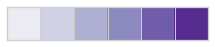

<Figure size 792x1440 with 0 Axes>

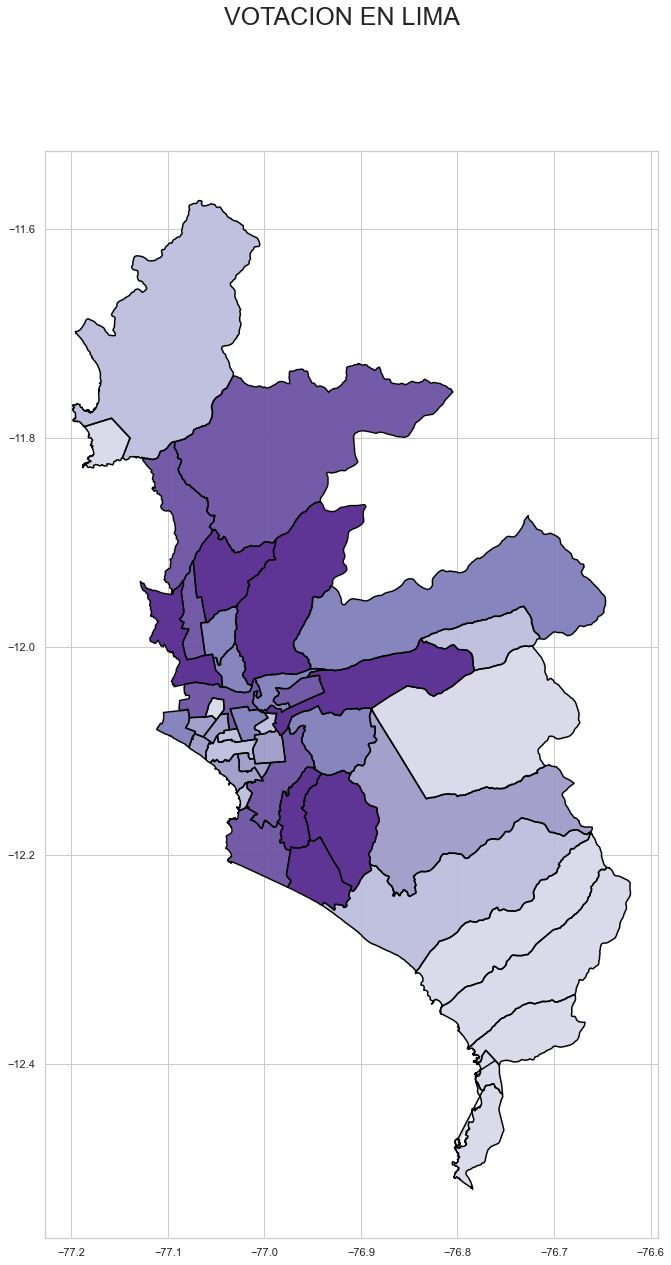

In [67]:
color_pallete = 1 # 'Púrpuras'
plot_ciudades_data(sf,'VOTACION EN LIMA', DISTLIMAidx, data=data2,color=color_pallete,print_id=False)

In [ ]:
data7=DATASHAPE_f["VOTOS"]
DISTPERUidx=list(DATASHAPE_f.DISTRITO.index)

In [ ]:
plot_ciudades_data(sf,'VOTACION EN PERU', DISTPERUidx, data=data7,color=color_pallete, print_id=False,figsize=(15,20))

### Tarea: 0.5 puntos en el parcial por cada pregunta

1. Invierta la paleta de colores para que los mapas hagan sentido en relación a la votación. 
2. Grafique nuevamente los mapas y presente toda la tarea en un html. 
3. Con la data disponible, cree mapas con colores diferenciados, indicando el partido ganador en cada distrito.
4. ¿Se puede hacer alguna inferencia de qué candidato que pasó a la segunda vuelta ganará en cada Distrito? De ser así, aplique y explique. 

In [ ]:
def correcion(x=int):
    lista = []
    while x >= 1:
        x -= 1
        lista += [x]
    return lista;

In [ ]:
def calc_color(data, color=None):
        if color==1: color_sq=['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq=['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors='YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors ='YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
                                labels=correcion(6))        # AQUI hemos aplicado el comando que permite asignar correctamente los elementos                                           
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [ ]:
def plot_map_fill_multiples_ids_tone(sf, title, ciudad,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    La función se redefine para poder tener un Heatmap o mapa de calor
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=25)
    ax.grid(True)   # Este comando sirve para agregar las lineas detras de los graficos por default    
    for id in ciudad:                            
        #print(id)
        shape_ex = sf.shape(id)
        x = [i[0] for i in shape_ex.points[:]]
        y = [i[1] for i in shape_ex.points[:]]
        plt.plot(x, y, "#000000",zorder=3)      # aqui se puede modificar el color de las lineas del grafico
        
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[ciudad.index(id)],zorder=2)
        
        if print_id == True:
            DIST=sf.record(id)['NOMBDIST']
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, DIST, fontsize=10)
            
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 


In [ ]:
def plot_ciudades_data(sf, title, ciudades, data=None, 
                      color=None, print_id=False,figsize=(11,20)):
    '''
    Se dibuja el mapa con los distritos indicados
    '''
    
    color_ton, bins = calc_color(data, color)
    plot_map_fill_multiples_ids_tone(sf, title, ciudades, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = figsize);

In [ ]:
color_pallete = 1 # 'Púrpuras'
plot_ciudades_data(sf,'VOTACION EN LIMA', DISTLIMAidx, data=data1,color=color_pallete,print_id=False)

In [ ]:
DISTPERUidx=list(DATASHAPE.DISTRITO.index)
data=RESULTADOS_DIST.VOTOS

In [ ]:
plot_ciudades_data(sf,'VOTACION EN PERU', DISTPERUidx, data=data,color=color_pallete, print_id=False,figsize=(15,20))

### 3° Pregunta Tarea

Para poder responder a esta pregunta, primer necesitaremos una base de datos tal que nos muestre al partido que obtuvo más votos por cada Distrito, para lo cual realizaremos los siguientes pasos:

In [68]:
RESULTADOS_PARTIDO_DIST_c=PRESIDENCIAL3.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO","AUTORIDAD"],as_index=False)["VOTOS"].sum()
RESULTADOS_PARTIDO_DIST_c.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,AUTORIDAD,VOTOS
0,AMAZONAS,BAGUA,ARAMANGO,010202,ACCION POPULAR,102
1,AMAZONAS,BAGUA,ARAMANGO,010202,ALIANZA PARA EL PROGRESO,147
2,AMAZONAS,BAGUA,ARAMANGO,010202,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,43
3,AMAZONAS,BAGUA,ARAMANGO,010202,DEMOCRACIA DIRECTA,3
4,AMAZONAS,BAGUA,ARAMANGO,010202,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",10


In [69]:
RESULTADOS_PARTIDO_DIST_d=RESULTADOS_PARTIDO_DIST_c.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO"],as_index=False)["VOTOS"].max()
RESULTADOS_PARTIDO_DIST_d.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,VOTOS
0,AMAZONAS,BAGUA,ARAMANGO,010202,533
1,AMAZONAS,BAGUA,BAGUA,010205,1580
2,AMAZONAS,BAGUA,COPALLIN,010203,220
3,AMAZONAS,BAGUA,EL PARCO,010204,95
4,AMAZONAS,BAGUA,IMAZA,010206,1236


In [70]:
RP_Dist_f=pd.merge(RESULTADOS_PARTIDO_DIST_c, RESULTADOS_PARTIDO_DIST_d, how="inner", on = ["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO","VOTOS"])
RP_Dist_f.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,AUTORIDAD,VOTOS
0,AMAZONAS,BAGUA,ARAMANGO,010202,PARTIDO POLITICO NACIONAL PERU LIBRE,533
1,AMAZONAS,BAGUA,BAGUA,010205,PARTIDO POLITICO NACIONAL PERU LIBRE,1580
2,AMAZONAS,BAGUA,COPALLIN,010203,PARTIDO NACIONALISTA PERUANO,220
3,AMAZONAS,BAGUA,EL PARCO,010204,PARTIDO POLITICO NACIONAL PERU LIBRE,95
4,AMAZONAS,BAGUA,IMAZA,010206,PARTIDO POLITICO NACIONAL PERU LIBRE,1236


In [71]:
RP_Dist_f['Numero_Partido'] = np.where(
    RP_Dist_f['AUTORIDAD'] == 'PARTIDO POLITICO NACIONAL PERU LIBRE',0, np.where(
    RP_Dist_f['AUTORIDAD'] == 'FUERZA POPULAR', 1, np.where(
    RP_Dist_f['AUTORIDAD'] == 'RENOVACION POPULAR',2,np.where(
    RP_Dist_f['AUTORIDAD'] == 'AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL',3,np.where(
    RP_Dist_f['AUTORIDAD'] == 'ACCION POPULAR',4,np.where(
    RP_Dist_f['AUTORIDAD'] == 'JUNTOS POR EL PERU',5,np.where(
    RP_Dist_f['AUTORIDAD'] == 'ALIANZA PARA EL PROGRESO',6,np.where(
    RP_Dist_f['AUTORIDAD'] == "VICTORIA NACIONAL",7,np.where(
    RP_Dist_f['AUTORIDAD'] == "PODEMOS PERU",8,np.where(
    RP_Dist_f['AUTORIDAD'] == "PARTIDO MORADO",9,np.where(
    RP_Dist_f['AUTORIDAD'] == "PARTIDO POPULAR CRISTIANO - PPC",10,np.where(
    RP_Dist_f['AUTORIDAD'] == "PARTIDO DEMOCRATICO SOMOS PERU",11,np.where(
    RP_Dist_f['AUTORIDAD'] == "PARTIDO NACIONALISTA PERUANO",12,np.where(
    RP_Dist_f['AUTORIDAD'] == "UNION POR EL PERU",13,np.where(
    RP_Dist_f['AUTORIDAD'] == "RENACIMIENTO UNIDO NACIONAL",14,np.where(
    RP_Dist_f['AUTORIDAD'] == "EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",15,np.where(
    RP_Dist_f['AUTORIDAD'] == "PERU PATRIA SEGURA",16,17)))))))))))))))))    

RP_Dist_f.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,AUTORIDAD,VOTOS,Numero_Partido
0,AMAZONAS,BAGUA,ARAMANGO,010202,PARTIDO POLITICO NACIONAL PERU LIBRE,533,0
1,AMAZONAS,BAGUA,BAGUA,010205,PARTIDO POLITICO NACIONAL PERU LIBRE,1580,0
2,AMAZONAS,BAGUA,COPALLIN,010203,PARTIDO NACIONALISTA PERUANO,220,12
3,AMAZONAS,BAGUA,EL PARCO,010204,PARTIDO POLITICO NACIONAL PERU LIBRE,95,0
4,AMAZONAS,BAGUA,IMAZA,010206,PARTIDO POLITICO NACIONAL PERU LIBRE,1236,0


In [76]:
RP_Dist_f.tail()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,AUTORIDAD,VOTOS,Numero_Partido
1879,UCAYALI,PADRE ABAD,CURIMANA,250203,PARTIDO POLITICO NACIONAL PERU LIBRE,641,0
1880,UCAYALI,PADRE ABAD,IRAZOLA,250202,PARTIDO POLITICO NACIONAL PERU LIBRE,998,0
1881,UCAYALI,PADRE ABAD,NESHUYA,250204,PARTIDO POLITICO NACIONAL PERU LIBRE,355,0
1882,UCAYALI,PADRE ABAD,PADRE ABAD,250201,PARTIDO POLITICO NACIONAL PERU LIBRE,1805,0
1883,UCAYALI,PURUS,PURUS,250401,ALIANZA PARA EL PROGRESO,230,6


In [92]:
RP_Dist_f['AUTORIDAD'].value_counts()

PARTIDO POLITICO NACIONAL PERU LIBRE              1100
FUERZA POPULAR                                     342
ACCION POPULAR                                     143
JUNTOS POR EL PERU                                  77
ALIANZA PARA EL PROGRESO                            72
PARTIDO NACIONALISTA PERUANO                        49
AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL         42
RENOVACION POPULAR                                  30
PODEMOS PERU                                        11
VICTORIA NACIONAL                                    9
PARTIDO DEMOCRATICO SOMOS PERU                       6
EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD       2
RENACIMIENTO UNIDO NACIONAL                          1
Name: AUTORIDAD, dtype: int64

In [73]:
RP_Dist_f_2["Numero_Partido"].value_counts()

0     1100
1      342
4      143
5       77
6       72
12      49
3       42
2       30
8       11
7        9
11       6
15       2
14       1
Name: Numero_Partido, dtype: int64

Ahora qeu ya tenemos la base de datos que queriamos, modificaremos la funcion calc_color para que pueda interpretar la variable Numero_Partido, la cual adquiere valores que van desde el 0 hasta el 17.

0 -------------- Para el Partido que saco la mayor votación a nivel Nacional

#### .............

#### .............

#### .............

17 ------------- Para el Partido que obtuvo la menor votación a nivel Nacional

### Debemos siempre fijarnos que la base que se anexara a DATASHAPE tenga similar numero de observaciones, es decir, debe tener de preferencia observaciones para igual numero de distritos en este caso.

### Es por ello que realizamos el siguiente procedimiento, pues solo nos interesa el numero de partido que se le asigna a cada distrito del Perú

In [72]:
RP_Dist_f_2=RP_Dist_f.copy()
RP_Dist_f_2=RP_Dist_f_2[["DEPARTAMENTO","PROVINCIA","DISTRITO","Numero_Partido"]]

In [74]:
RP_Dist_f_2.tail()

,DEPARTAMENTO,PROVINCIA,DISTRITO,Numero_Partido
1879,UCAYALI,PADRE ABAD,CURIMANA,0
1880,UCAYALI,PADRE ABAD,IRAZOLA,0
1881,UCAYALI,PADRE ABAD,NESHUYA,0
1882,UCAYALI,PADRE ABAD,PADRE ABAD,0
1883,UCAYALI,PURUS,PURUS,6


In [75]:
DATASHAPE.tail()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,coords
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-71.95147698177726, -14.838364607240806), (-..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-72.37490073198313, -15.249902732924738), (-..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-71.96975710710478, -15.135966357561301), (-..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-72.31257998228034, -15.814259982911835), (-..."
1873,12,JUNIN,06,SATIPO,04,MAZAMARI,,120604,1206,120604,152,MAZAMARI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-73.98588748272113, -11.933824980138695), (-..."


In [88]:
DATASHAPE_f= pd.merge(DATASHAPE,RP_Dist_f_2,how="left", on=["DEPARTAMENTO","PROVINCIA","DISTRITO"])
DATASHAPE_f.shape

(1883, 17)

In [103]:
result_df = DATASHAPE_f.drop_duplicates(subset=['DEPARTAMENTO', 'PROVINCIA',"DISTRITO"], keep='first')
result_df.reset_index(drop=True,inplace=True)
result_df["Numero_Partido"].fillna(17, inplace=True)
result_df.loc[:,"Numero_Partido"]=result_df["Numero_Partido"].astype(int)

In [104]:
result_df["Numero_Partido"].value_counts()

0     1054
1      321
4      136
17      88
5       74
6       67
12      45
3       41
2       26
8        9
7        5
11       5
15       2
14       1
Name: Numero_Partido, dtype: int64

In [105]:
data5=result_df["Numero_Partido"]
DISTPERUidx=list(result_df.DISTRITO.index)

In [106]:
colors = ['#FF0000','#FF8F00','#00D1FF', "#F9178F","#FF4646","#59FF00", "#1A73DE","#FBFE23"
                              ,"#050505","#8700FF","#008606","#9BB2BB","#FFC4C4","#C98600","#4D0909","#068521"
                              ,"#9BB2BB","#9BB2BB"]
customPalette  = sns.set_palette(sns.color_palette(colors))

In [107]:
def calc_color(data, color=None):
    # 1°: Se crea una paleta de colores
        if color==1: color_sq=['#FF0000','#FF8F00','#00D1FF', "#F9178F","#FF4646","#59FF00", "#1A73DE","#FBFE23"
                              ,"#050505","#8700FF","#008606","#9BB2BB","#FFC4C4","#C98600","#4D0909","#068521"
                              ,"#9BB2BB","#9BB2BB"]; colors = customPalette ;
            
    #2° Parte: Divide la columna "Numero_Partido" en 18 grupos y le asigna un entero [0,17] a cada observacion dependiendo del grupo al que pertenezca.        
        new_data, bins = pd.cut(data, 18, retbins=True, labels=list(range(18))) 

    #3° Parte: A partir del entero de la parte anterior, agrega un color a la lista vacia color_ton    
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
         #4° Parte: Crea una leyenda de colores   (OPCIONAL)
        if color != 9:
            colors = sns.color_palette(colors, n_colors=18)
            sns.palplot(colors, 0.6);
            print(" Cast. K Porky Sot Lesc Vero  ")  
        return color_ton, bins;

In [108]:
def plot_map_fill_multiples_ids_tone(sf, title, ciudad,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    La función se redefine para poder tener un Heatmap o mapa de calor
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=25)
    ax.grid(True)   # Este comando sirve para agregar las lineas detras de los graficos por default    
    for id in ciudad:                            
        #print(id)
        shape_ex = sf.shape(id)
        x = [i[0] for i in shape_ex.points[:]]
        y = [i[1] for i in shape_ex.points[:]]
        plt.plot(x, y, "#000000",zorder=3)      # aqui se puede modificar el color de las lineas del grafico
        
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[ciudad.index(id)],zorder=2)
        
        if print_id == True:
            DIST=sf.record(id)['NOMBDIST']
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, DIST, fontsize=10)
            
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

In [109]:
def plot_ciudades_data(sf, title, ciudades, data=None, 
                      color=None, print_id=False,figsize=(11,20)):
    '''
    Se dibuja el mapa con los distritos indicados
    '''
    
    color_ton, bins = calc_color(data, color)
    plot_map_fill_multiples_ids_tone(sf, title, ciudades, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = figsize);

In [110]:
result_df.tail()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,coords,Numero_Partido
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-71.95147698177726, -14.838364607240806), (-...",0
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-72.37490073198313, -15.249902732924738), (-...",0
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-71.96975710710478, -15.135966357561301), (-...",0
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-72.31257998228034, -15.814259982911835), (-...",4
1873,12,JUNIN,06,SATIPO,04,MAZAMARI,,120604,1206,120604,152,MAZAMARI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-73.98588748272113, -11.933824980138695), (-...",0


In [111]:
DATASHAPE.tail()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,coords
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-71.95147698177726, -14.838364607240806), (-..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-72.37490073198313, -15.249902732924738), (-..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-71.96975710710478, -15.135966357561301), (-..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-72.31257998228034, -15.814259982911835), (-..."
1873,12,JUNIN,06,SATIPO,04,MAZAMARI,,120604,1206,120604,152,MAZAMARI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-73.98588748272113, -11.933824980138695), (-..."


#GUIA DE COLORES:
  
Rojo Intenso: Peru Libre  '#FF0000'

Naranja Claro: Fuerza Popular '#FF8F00'

Celeste: Renovacion Popular  '#00D1FF', 

Rosado Oscuro: Avanza Pais

Rojo Claro  : Accion Popular

Verde claro: Juntos por el Perú

Azul_metalico: Alianza Para el Progreso

Amarillo: Victoria Nacional

Negro: Podemos Peru

Rojo_despintado_blanco: Partido Nacionalista Peruano

Verde oscuro: Frente Amplio

Marrón :Renacimiento Unido Nacional 

Plomo: Otros


In [112]:
data5=result_df["Numero_Partido"]
DISTPERUidx=list(result_df.DISTRITO.index)
print(len(DISTPERUidx))

1874


In [ ]:
aaaaaaaaaaaaaaaaaaaaaa

 Cast. K Porky Sot Lesc Vero  


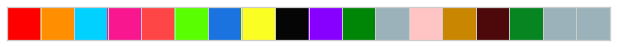

<Figure size 1080x1440 with 0 Axes>

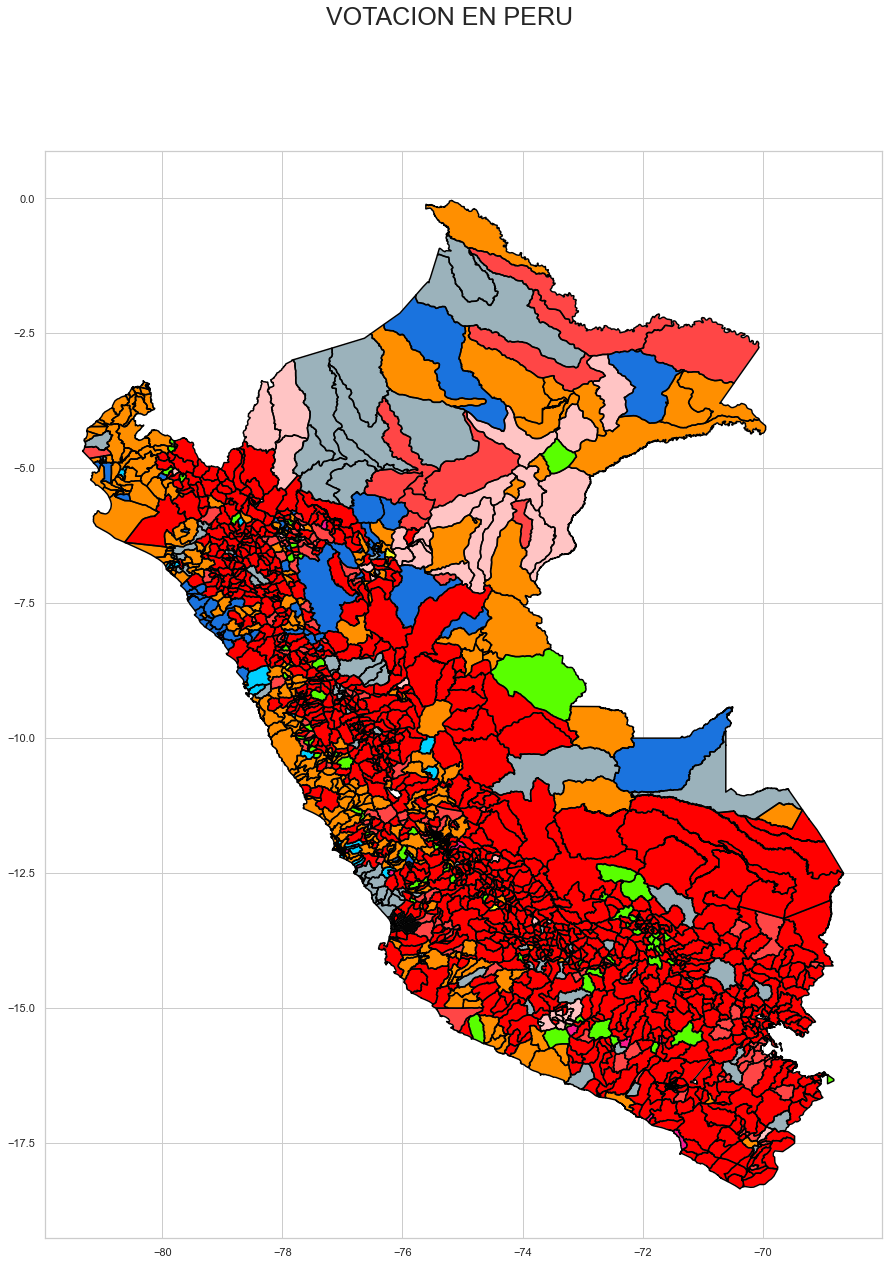

In [113]:
color_pallete = 1 
plot_ciudades_data(sf,'VOTACION EN PERU', DISTPERUidx, data=data5,color=color_pallete, print_id=False,figsize=(15,20))

## Pregunta 4°

 ¿Se puede hacer alguna inferencia de qué candidato que pasó a la segunda vuelta ganará en cada Distrito? De ser así, aplique y explique. 

Desde mi punto de vista, si es posible hacer alguna inferencia de que candidato ganará en cada Distrito. Considero que una manera eficaz -aunque algo arbitraria- de hacerlo es agrupar los votos que tanto Peru Libre como Fuerza Popular recibieron con los de los partidos que quedaron fuera. Para ello, aplicaremos la siguiente lógica:

Los votantes que en la primera vuelta votaron por PARTIDOS asociados ideologicamente a la "IZQUERDA" o regionales votaran al 100% por Castillo. A mi parecer, esto aplica para partidos como Partido Nacionalista Peruano, Union por el Peru, Juntos por el Peru, RUNA, Frente Amplio y Democracia Directa.

Los votantes que en la primera vuelta votaron por PARTIDOS de derecha y limeños votaran al 100% por Keiko. A mi parecer, esto aplica a partidos como Renovación Popular, Avanza País, Victoria Nacional, Peru Patria Segura y el PPC.

En el caso de los demas partidos: aplicaremos la siguiente logica por cada partido restante:

* En el caso de Accion Popular, tenemos que su candidato presidencial no apoya a ningun candidato. Pero por el perfil ideologico y el origen provinciano del mismo, tenemos que es razonable suponer que los que votaron por ese partido un 60% irá a Pedro Castillo, y un 40% irá a Keiko.


* En el caso de Alianza para el Progreso, tenemos que su candidato presidencial apoya expresamente a Keiko. Entonces, supondremos que de los votantes de este partido un 80% ira para Keiko, meintras que un residuo de 20% ira para Castillo. Ello pues cierto sector del electororado de este partido comparte costumbres, comovisiones y fenotipo del candidato Castillo.


* En el caso de Podemos Perú, tenemos que su candidato es expresamente antifujimorista, aunque podria decirse que s eubuca dentro del espectro ideologico de la derecha. Por lo tanto, supondremos que la mitad de sus votantes ira para Keiko, y la otra mitad ira para Castillo.


* En el caso del Partido Morado, tenemos que es abiertamente antifujimorista y es un partido de centro, pero tiene un perfil mas limeño y acomodado. Por lo tanto, en este caso tambien supondremos que un 50% ira para Keiko y el otro 50% ira para Castillo.


* Finalmente, en el caso de Somos Peru, tenemos que es un partido de centro-derecha, pero que tuvo como candidato presidencial y como cabeza de lista parlamentaria a dos figuras que antagonizaron con el Fujimorismo en los ultimos años. Es por ello que consideramos que de los votos presidenciales para este partido es aceptable suponer que un 20% ira para Castillo y un 80% para Keiko.



Entonces, ya presentada nuestra lógica empezaremos a realziar operaciones para poder obtener la base de datos apropiada para graficar:

In [114]:
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO POLITICO NACIONAL PERU LIBRE",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="FUERZA POPULAR",'Votos_Castillo'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="RENOVACION POPULAR",'Votos_Castillo'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL",'Votos_Castillo'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="ACCION POPULAR",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]*(6/10)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="JUNTOS POR EL PERU",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="ALIANZA PARA EL PROGRESO",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]*(2/10)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="VICTORIA NACIONAL",'Votos_Castillo'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PODEMOS PERU",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]*(1/2)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO MORADO",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]*(1/2)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO POPULAR CRISTIANO - PPC",'Votos_Castillo'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO DEMOCRATICO SOMOS PERU",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]*(2/10)      #El apoyo del candidato presidencia de este castillo a Pedro Cstillo, mas por rechazo a FUJIMORI
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO NACIONALISTA PERUANO",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="UNION POR EL PERU",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="RENACIMIENTO UNIDO NACIONAL",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PERU PATRIA SEGURA",'Votos_Castillo'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="DEMOCRACIA DIRECTA",'Votos_Castillo'] = PRESIDENCIAL4["VOTOS"]


In [115]:
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO POLITICO NACIONAL PERU LIBRE",'Votos_Keiko'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="FUERZA POPULAR",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="RENOVACION POPULAR",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="ACCION POPULAR",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]*(4/10)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="JUNTOS POR EL PERU",'Votos_Keiko'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="ALIANZA PARA EL PROGRESO",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]*(8/10)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="VICTORIA NACIONAL",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PODEMOS PERU",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]*(1/2)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO MORADO",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]*(1/2)
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO POPULAR CRISTIANO - PPC",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO DEMOCRATICO SOMOS PERU",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]*(8/10)      #El apoyo del candidato presidencia de este castillo a Pedro Cstillo, mas por rechazo a FUJIMORI
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PARTIDO NACIONALISTA PERUANO",'Votos_Keiko'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="UNION POR EL PERU",'Votos_Keiko'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="RENACIMIENTO UNIDO NACIONAL",'Votos_Keiko'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",'Votos_Keiko'] = 0
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="PERU PATRIA SEGURA",'Votos_Keiko'] = PRESIDENCIAL4["VOTOS"]
PRESIDENCIAL4.loc[PRESIDENCIAL4['AUTORIDAD']=="DEMOCRACIA DIRECTA",'Votos_Keiko'] = 0


In [116]:
VOTOS_Castillo_por_Distrito=PRESIDENCIAL4.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO"],as_index=False)["Votos_Castillo"].sum()
VOTOS_Castillo_por_Distrito["Candidato_x"]="Castillo"

In [117]:
VOTOS_Keiko_por_Distrito=PRESIDENCIAL4.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO"],as_index=False)["Votos_Keiko"].sum()
VOTOS_Keiko_por_Distrito["Candidato_y"]="Keiko"

In [118]:
xyz=pd.merge(VOTOS_Castillo_por_Distrito,VOTOS_Keiko_por_Distrito, how="inner", on=["DEPARTAMENTO","PROVINCIA","DISTRITO","CCODI_UBIGEO"])
xyz.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,Votos_Castillo,Candidato_x,Votos_Keiko,Candidato_y
0,AMAZONAS,BAGUA,ARAMANGO,010202,1000.6,Castillo,843.4,Keiko
1,AMAZONAS,BAGUA,BAGUA,010205,2973.2,Castillo,2748.8,Keiko
2,AMAZONAS,BAGUA,COPALLIN,010203,568.8,Castillo,331.2,Keiko
3,AMAZONAS,BAGUA,EL PARCO,010204,205.6,Castillo,147.4,Keiko
4,AMAZONAS,BAGUA,IMAZA,010206,2737.3,Castillo,921.7,Keiko


In [119]:
xyz['Candidato_ganador_distrito'] = np.where(
    xyz['Votos_Castillo'] > xyz["Votos_Keiko"],"Castillo","Keiko")
xyz.head(100)

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,Votos_Castillo,Candidato_x,Votos_Keiko,Candidato_y,Candidato_ganador_distrito
0,AMAZONAS,BAGUA,ARAMANGO,010202,1000.6,Castillo,843.4,Keiko,Castillo
1,AMAZONAS,BAGUA,BAGUA,010205,2973.2,Castillo,2748.8,Keiko,Castillo
2,AMAZONAS,BAGUA,COPALLIN,010203,568.8,Castillo,331.2,Keiko,Castillo
3,AMAZONAS,BAGUA,EL PARCO,010204,205.6,Castillo,147.4,Keiko,Castillo
4,AMAZONAS,BAGUA,IMAZA,010206,2737.3,Castillo,921.7,Keiko,Castillo
...,...,...,...,...,...,...,...,...,...
95,ANCASH,ASUNCION,ACOCHACA,021802,275.8,Castillo,227.2,Keiko,Castillo
96,ANCASH,ASUNCION,CHACAS,021801,494.9,Castillo,369.1,Keiko,Castillo
97,ANCASH,BOLOGNESI,ABELARDO PARDO LEZAMETA,020302,9.2,Castillo,12.8,Keiko,Keiko
98,ANCASH,BOLOGNESI,ANTONIO RAYMONDI,020321,201.6,Castillo,129.4,Keiko,Castillo


In [120]:
xyz['Numero_Ganador'] = np.where(
    xyz['Candidato_ganador_distrito'] == 'Castillo',0,2) 

In [121]:
xyz.shape

(1874, 10)

In [122]:
xyz.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,Votos_Castillo,Candidato_x,Votos_Keiko,Candidato_y,Candidato_ganador_distrito,Numero_Ganador
0,AMAZONAS,BAGUA,ARAMANGO,010202,1000.6,Castillo,843.4,Keiko,Castillo,0
1,AMAZONAS,BAGUA,BAGUA,010205,2973.2,Castillo,2748.8,Keiko,Castillo,0
2,AMAZONAS,BAGUA,COPALLIN,010203,568.8,Castillo,331.2,Keiko,Castillo,0
3,AMAZONAS,BAGUA,EL PARCO,010204,205.6,Castillo,147.4,Keiko,Castillo,0
4,AMAZONAS,BAGUA,IMAZA,010206,2737.3,Castillo,921.7,Keiko,Castillo,0


In [135]:
DATASHAPE_z= pd.merge(DATASHAPE,xyz,how="left", on=["DEPARTAMENTO","PROVINCIA","DISTRITO"])
DATASHAPE_z.shape

(1874, 23)

In [136]:
DATASHAPE_z["Numero_Ganador"].fillna(0, inplace=True)
DATASHAPE_z.loc[:,"Numero_Ganador"]=DATASHAPE_z["Numero_Ganador"].astype(int)

In [127]:
result_dz = DATASHAPE_z.drop_duplicates(subset=['DEPARTAMENTO', 'PROVINCIA',"DISTRITO"], keep='first')
result_dz.reset_index(drop=True,inplace=True)
result_dz["Numero_Ganador"].fillna(0, inplace=True)    # podemos reemplazar por el valor que consideremos pertinente
result_dz.loc[:,"Numero_Ganador"]=result_dz["Numero_Ganador"].astype(int)

## Dependiendo si es que DATASHAPE_f tiene las mismas observaciones que DATASHAPE o no, entonces modifciaremos el siguiente comando ya sea con "result_dz" o "DATASHAPE_z".

In [138]:
data6=DATASHAPE_z["Numero_Ganador"]
DISTPERUidx=list(DATASHAPE_z.DISTRITO.index)

Una vez definidas las variables que necesitamos, podremos empezar a modificar la funcion cal_color para que utilize solo los dos colores representativos de cada partido (Peru Libre y Fuerza Popular).

In [139]:
colors = ['#FF0000','#FF8F00']
customPalette  = sns.set_palette(sns.color_palette(colors))

In [140]:
def calc_color(data, color=None):
    # 1°: Se crea una paleta de colores
        if color==1: color_sq=['#FF0000','#FF8F00']; colors = customPalette;
            
    #2° Parte: Divide la columna "VOTOS" en 6 grupos y le asigna un entero [0,5] a cada observacion dependiendo del grupo al que pertenezca.        
        new_data, bins = pd.cut(data, 2, retbins=True, labels=list(range(2))) 

    #3° Parte: A partir del entero de la parte anterior, agrega un color a la lista vacia color_ton    
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
    #4° Parte: Crea una leyenda de colores   (OPCIONAL)
        if color != 9:
            colors = sns.color_palette(colors, n_colors=2)
            sns.palplot(colors, 0.6);
            for i in range(2):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   Castillo   Keiko   ")  
        return color_ton, bins;


1: 0 => 0 
2: 1 => 1 

   Castillo   Keiko   


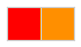

<Figure size 1080x1440 with 0 Axes>

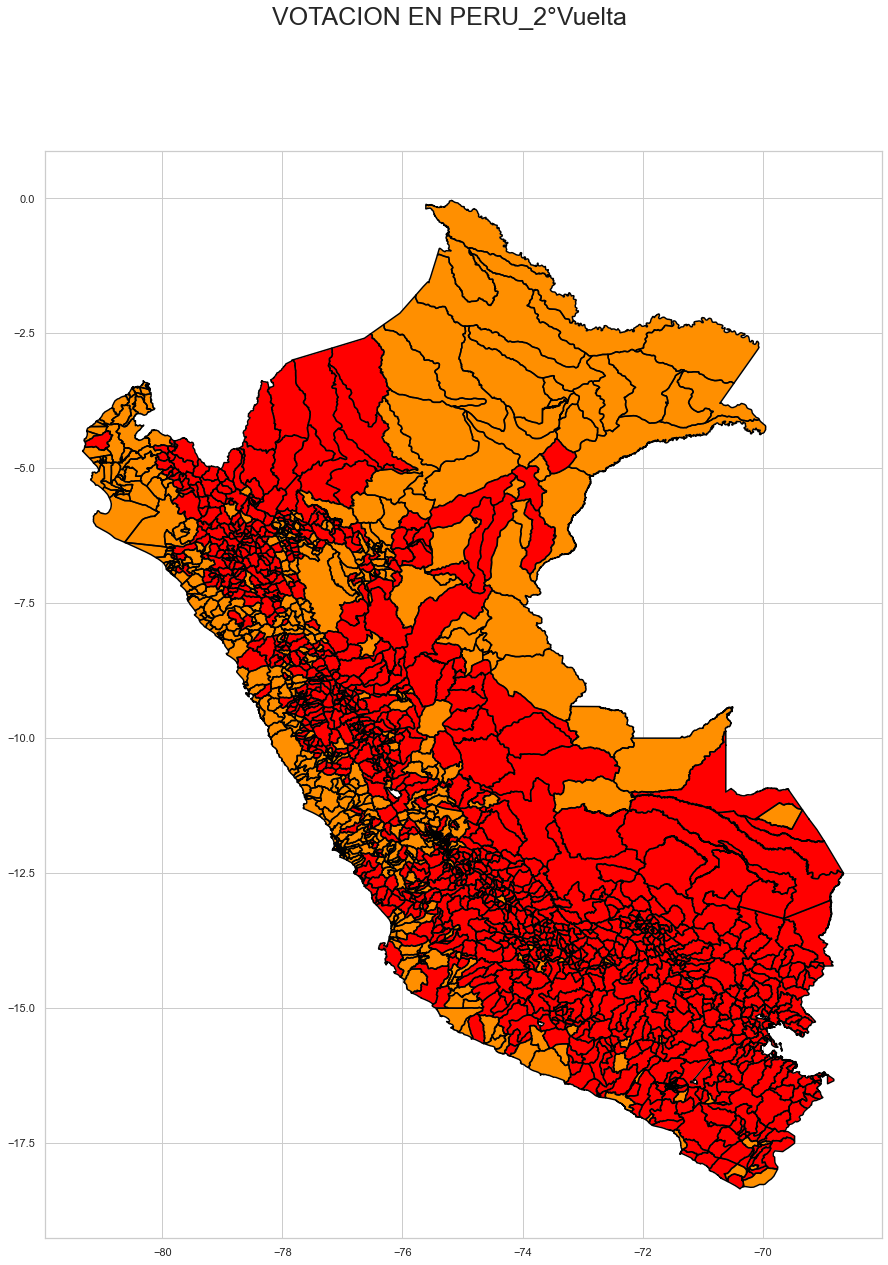

In [141]:
color_pallete = 1 # 'Púrpuras'
plot_ciudades_data(sf,'VOTACION EN PERU_2°Vuelta', DISTPERUidx, data=data6,color=color_pallete, print_id=False,figsize=(15,20))

GRACIAS POR SU ATENCIÓN. Desde donde vivo le deseamos pronta recuperación. Saludos !!